### Ridge Lasso and  ElasticNet Regression

1.  The main aim of this project is to make a complete end to end machine learning project using  Ridge, Lasso and ElasticNet Regression.

2.  We need to compare every algorithm with each other and see how the regularization affect linear regression.


### Steps performed by this algorithm:- 

1.   Import all the necessary libraries

2.   Load the dataset

3.   Perform EDA

4.   Divide the dataset into independent and dependent variables

5.   Divide the independent and dependent variables into training and testing data

6.   Standardize the input data

7.   Train the model using Linear Regression, Ridge, Lasso and Elastic Net Regression.

8.   Make predictions and compare models using evaluation metrics (R², RMSE)

9.   Visualize the Results

### Step 1:  Import all the necessary libraries

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model  import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model  import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics       import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score

### Step 2:  Load the dataset

In [48]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')

In [49]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


### Step 3:  Perform EDA

In [50]:
### display the first five rows of the dataset

print(df.head())

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [51]:
### display the last five rows of the dataset

df.tail()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [52]:
### get the total number of records used in the data set


print(len(df))

506


In [53]:
### get the shape of the dataset

print(df.shape)

(506, 14)


In [54]:
### get the columns used in the dataset

df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [55]:
### get the information about the columns used in the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [56]:
### get the descriptive statistics about the columns used in the dataset

df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [57]:
### To check for any NULL Values in the dataset

df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

### OBSERVATIONS:

1.  There are no NULL Values used in the dataset.

In [58]:
### To check or any duplicates in the dataset

print(df[df.duplicated()])

Empty DataFrame
Columns: [crim, zn, indus, chas, nox, rm, age, dis, rad, tax, ptratio, b, lstat, medv]
Index: []


### OBSERVATIONS:

1. There are no duplicates left in the dataset.

### Step 4:  Divide the dataset into independent and dependent variables

In [59]:
X = df.drop(columns='medv', axis=1)
Y = df['medv']

In [60]:
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [61]:
Y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [62]:
X.ndim

2

In [63]:
Y.ndim

1

In [64]:
### Convert 1d ---> 2D

Y = np.expand_dims(Y, axis=1)

print(Y)

[[24. ]
 [21.6]
 [34.7]
 [33.4]
 [36.2]
 [28.7]
 [22.9]
 [27.1]
 [16.5]
 [18.9]
 [15. ]
 [18.9]
 [21.7]
 [20.4]
 [18.2]
 [19.9]
 [23.1]
 [17.5]
 [20.2]
 [18.2]
 [13.6]
 [19.6]
 [15.2]
 [14.5]
 [15.6]
 [13.9]
 [16.6]
 [14.8]
 [18.4]
 [21. ]
 [12.7]
 [14.5]
 [13.2]
 [13.1]
 [13.5]
 [18.9]
 [20. ]
 [21. ]
 [24.7]
 [30.8]
 [34.9]
 [26.6]
 [25.3]
 [24.7]
 [21.2]
 [19.3]
 [20. ]
 [16.6]
 [14.4]
 [19.4]
 [19.7]
 [20.5]
 [25. ]
 [23.4]
 [18.9]
 [35.4]
 [24.7]
 [31.6]
 [23.3]
 [19.6]
 [18.7]
 [16. ]
 [22.2]
 [25. ]
 [33. ]
 [23.5]
 [19.4]
 [22. ]
 [17.4]
 [20.9]
 [24.2]
 [21.7]
 [22.8]
 [23.4]
 [24.1]
 [21.4]
 [20. ]
 [20.8]
 [21.2]
 [20.3]
 [28. ]
 [23.9]
 [24.8]
 [22.9]
 [23.9]
 [26.6]
 [22.5]
 [22.2]
 [23.6]
 [28.7]
 [22.6]
 [22. ]
 [22.9]
 [25. ]
 [20.6]
 [28.4]
 [21.4]
 [38.7]
 [43.8]
 [33.2]
 [27.5]
 [26.5]
 [18.6]
 [19.3]
 [20.1]
 [19.5]
 [19.5]
 [20.4]
 [19.8]
 [19.4]
 [21.7]
 [22.8]
 [18.8]
 [18.7]
 [18.5]
 [18.3]
 [21.2]
 [19.2]
 [20.4]
 [19.3]
 [22. ]
 [20.3]
 [20.5]
 [17.3]
 [18.8]


In [65]:
Y.ndim

2

### Step 5:  Divide the independent and dependent variables into training and testing data

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [67]:
print("----------------------Input Data-------------------------------------------------")

print(X_train)

----------------------Input Data-------------------------------------------------
         crim    zn  indus  chas     nox     rm   age     dis  rad  tax  \
477  15.02340   0.0  18.10     0  0.6140  5.304  97.3  2.1007   24  666   
15    0.62739   0.0   8.14     0  0.5380  5.834  56.5  4.4986    4  307   
332   0.03466  35.0   6.06     0  0.4379  6.031  23.3  6.6407    1  304   
423   7.05042   0.0  18.10     0  0.6140  6.103  85.1  2.0218   24  666   
19    0.72580   0.0   8.14     0  0.5380  5.727  69.5  3.7965    4  307   
..        ...   ...    ...   ...     ...    ...   ...     ...  ...  ...   
106   0.17120   0.0   8.56     0  0.5200  5.836  91.9  2.2110    5  384   
270   0.29916  20.0   6.96     0  0.4640  5.856  42.1  4.4290    3  223   
348   0.01501  80.0   2.01     0  0.4350  6.635  29.7  8.3440    4  280   
435  11.16040   0.0  18.10     0  0.7400  6.629  94.6  2.1247   24  666   
102   0.22876   0.0   8.56     0  0.5200  6.405  85.4  2.7147    5  384   

     ptratio     

In [68]:
print(X_test)

         crim    zn  indus  chas    nox     rm    age     dis  rad  tax  \
173   0.09178   0.0   4.05     0  0.510  6.416   84.1  2.6463    5  296   
274   0.05644  40.0   6.41     1  0.447  6.758   32.9  4.0776    4  254   
491   0.10574   0.0  27.74     0  0.609  5.983   98.8  1.8681    4  711   
72    0.09164   0.0  10.81     0  0.413  6.065    7.8  5.2873    4  305   
452   5.09017   0.0  18.10     0  0.713  6.297   91.8  2.3682   24  666   
..        ...   ...    ...   ...    ...    ...    ...     ...  ...  ...   
412  18.81100   0.0  18.10     0  0.597  4.628  100.0  1.5539   24  666   
436  14.42080   0.0  18.10     0  0.740  6.461   93.3  2.0026   24  666   
411  14.05070   0.0  18.10     0  0.597  6.657  100.0  1.5275   24  666   
86    0.05188   0.0   4.49     0  0.449  6.015   45.1  4.4272    3  247   
75    0.09512   0.0  12.83     0  0.437  6.286   45.0  4.5026    5  398   

     ptratio       b  lstat  
173     16.6  395.50   9.04  
274     17.6  396.90   3.53  
491     2

In [69]:
print("--------------------------------Output Data------------------------------------------")

print(Y_train)

--------------------------------Output Data------------------------------------------


[[12. ]
 [19.9]
 [19.4]
 [13.4]
 [18.2]
 [24.6]
 [21.1]
 [24.7]
 [ 8.7]
 [27.5]
 [20.7]
 [36.2]
 [31.6]
 [11.7]
 [39.8]
 [13.9]
 [21.8]
 [23.7]
 [17.6]
 [24.4]
 [ 8.8]
 [19.2]
 [25.3]
 [20.4]
 [23.1]
 [37.9]
 [15.6]
 [45.4]
 [15.7]
 [22.6]
 [14.5]
 [18.7]
 [17.8]
 [16.1]
 [20.6]
 [31.6]
 [29.1]
 [15.6]
 [17.5]
 [22.5]
 [19.4]
 [19.3]
 [ 8.5]
 [20.6]
 [17. ]
 [17.1]
 [14.5]
 [50. ]
 [14.3]
 [12.6]
 [28.7]
 [21.2]
 [19.3]
 [23.1]
 [19.1]
 [25. ]
 [33.4]
 [ 5. ]
 [29.6]
 [18.7]
 [21.7]
 [23.1]
 [22.8]
 [21. ]
 [48.8]
 [14.6]
 [16.6]
 [27.1]
 [20.1]
 [19.8]
 [21. ]
 [41.3]
 [23.2]
 [20.4]
 [18.5]
 [29.4]
 [36.4]
 [24.4]
 [11.8]
 [13.8]
 [12.3]
 [17.8]
 [33.1]
 [26.7]
 [13.4]
 [14.4]
 [50. ]
 [22. ]
 [19.9]
 [23.8]
 [17.5]
 [12.7]
 [ 5.6]
 [31.1]
 [26.2]
 [19.4]
 [16.7]
 [13.8]
 [22.9]
 [15.3]
 [27.5]
 [36.1]
 [22.9]
 [24.5]
 [25. ]
 [50. ]
 [34.9]
 [31.7]
 [24.1]
 [22.1]
 [14.1]
 [42.8]
 [19.3]
 [32.2]
 [26.4]
 [21.8]
 [21.7]
 [ 8.3]
 [46.7]
 [43.1]
 [31.5]
 [10.5]
 [16.7]
 [20. ]
 [33.3]


In [70]:
print(Y_test)

[[23.6]
 [32.4]
 [13.6]
 [22.8]
 [16.1]
 [20. ]
 [17.8]
 [14. ]
 [19.6]
 [16.8]
 [21.5]
 [18.9]
 [ 7. ]
 [21.2]
 [18.5]
 [29.8]
 [18.8]
 [10.2]
 [50. ]
 [14.1]
 [25.2]
 [29.1]
 [12.7]
 [22.4]
 [14.2]
 [13.8]
 [20.3]
 [14.9]
 [21.7]
 [18.3]
 [23.1]
 [23.8]
 [15. ]
 [20.8]
 [19.1]
 [19.4]
 [34.7]
 [19.5]
 [24.4]
 [23.4]
 [19.7]
 [28.2]
 [50. ]
 [17.4]
 [22.6]
 [15.1]
 [13.1]
 [24.2]
 [19.9]
 [24. ]
 [18.9]
 [35.4]
 [15.2]
 [26.5]
 [43.5]
 [21.2]
 [18.4]
 [28.5]
 [23.9]
 [18.5]
 [25. ]
 [35.4]
 [31.5]
 [20.2]
 [24.1]
 [20. ]
 [13.1]
 [24.8]
 [30.8]
 [12.7]
 [20. ]
 [23.7]
 [10.8]
 [20.6]
 [20.8]
 [ 5. ]
 [20.1]
 [48.5]
 [10.9]
 [ 7. ]
 [20.9]
 [17.2]
 [20.9]
 [ 9.7]
 [19.4]
 [29. ]
 [16.4]
 [25. ]
 [25. ]
 [17.1]
 [23.2]
 [10.4]
 [19.6]
 [17.2]
 [27.5]
 [23. ]
 [50. ]
 [17.9]
 [ 9.6]
 [17.2]
 [22.5]
 [21.4]]


In [71]:
print("Shape of the input training data is:", X_train.shape)

print("Shape of the input testing data is:", X_test.shape)

Shape of the input training data is: (404, 13)
Shape of the input testing data is: (102, 13)


In [72]:
print(Y_train)

[[12. ]
 [19.9]
 [19.4]
 [13.4]
 [18.2]
 [24.6]
 [21.1]
 [24.7]
 [ 8.7]
 [27.5]
 [20.7]
 [36.2]
 [31.6]
 [11.7]
 [39.8]
 [13.9]
 [21.8]
 [23.7]
 [17.6]
 [24.4]
 [ 8.8]
 [19.2]
 [25.3]
 [20.4]
 [23.1]
 [37.9]
 [15.6]
 [45.4]
 [15.7]
 [22.6]
 [14.5]
 [18.7]
 [17.8]
 [16.1]
 [20.6]
 [31.6]
 [29.1]
 [15.6]
 [17.5]
 [22.5]
 [19.4]
 [19.3]
 [ 8.5]
 [20.6]
 [17. ]
 [17.1]
 [14.5]
 [50. ]
 [14.3]
 [12.6]
 [28.7]
 [21.2]
 [19.3]
 [23.1]
 [19.1]
 [25. ]
 [33.4]
 [ 5. ]
 [29.6]
 [18.7]
 [21.7]
 [23.1]
 [22.8]
 [21. ]
 [48.8]
 [14.6]
 [16.6]
 [27.1]
 [20.1]
 [19.8]
 [21. ]
 [41.3]
 [23.2]
 [20.4]
 [18.5]
 [29.4]
 [36.4]
 [24.4]
 [11.8]
 [13.8]
 [12.3]
 [17.8]
 [33.1]
 [26.7]
 [13.4]
 [14.4]
 [50. ]
 [22. ]
 [19.9]
 [23.8]
 [17.5]
 [12.7]
 [ 5.6]
 [31.1]
 [26.2]
 [19.4]
 [16.7]
 [13.8]
 [22.9]
 [15.3]
 [27.5]
 [36.1]
 [22.9]
 [24.5]
 [25. ]
 [50. ]
 [34.9]
 [31.7]
 [24.1]
 [22.1]
 [14.1]
 [42.8]
 [19.3]
 [32.2]
 [26.4]
 [21.8]
 [21.7]
 [ 8.3]
 [46.7]
 [43.1]
 [31.5]
 [10.5]
 [16.7]
 [20. ]
 [33.3]


In [73]:
print(Y_test)

[[23.6]
 [32.4]
 [13.6]
 [22.8]
 [16.1]
 [20. ]
 [17.8]
 [14. ]
 [19.6]
 [16.8]
 [21.5]
 [18.9]
 [ 7. ]
 [21.2]
 [18.5]
 [29.8]
 [18.8]
 [10.2]
 [50. ]
 [14.1]
 [25.2]
 [29.1]
 [12.7]
 [22.4]
 [14.2]
 [13.8]
 [20.3]
 [14.9]
 [21.7]
 [18.3]
 [23.1]
 [23.8]
 [15. ]
 [20.8]
 [19.1]
 [19.4]
 [34.7]
 [19.5]
 [24.4]
 [23.4]
 [19.7]
 [28.2]
 [50. ]
 [17.4]
 [22.6]
 [15.1]
 [13.1]
 [24.2]
 [19.9]
 [24. ]
 [18.9]
 [35.4]
 [15.2]
 [26.5]
 [43.5]
 [21.2]
 [18.4]
 [28.5]
 [23.9]
 [18.5]
 [25. ]
 [35.4]
 [31.5]
 [20.2]
 [24.1]
 [20. ]
 [13.1]
 [24.8]
 [30.8]
 [12.7]
 [20. ]
 [23.7]
 [10.8]
 [20.6]
 [20.8]
 [ 5. ]
 [20.1]
 [48.5]
 [10.9]
 [ 7. ]
 [20.9]
 [17.2]
 [20.9]
 [ 9.7]
 [19.4]
 [29. ]
 [16.4]
 [25. ]
 [25. ]
 [17.1]
 [23.2]
 [10.4]
 [19.6]
 [17.2]
 [27.5]
 [23. ]
 [50. ]
 [17.9]
 [ 9.6]
 [17.2]
 [22.5]
 [21.4]]


In [74]:
print("Shape of the output training data is:", Y_train.shape)

print("Shape of the output testing data is:", Y_test.shape)

Shape of the output training data is: (404, 1)
Shape of the output testing data is: (102, 1)


### Step 6: Standardize the input data

In [75]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

print("------------------------------Before Scaling the input training data------------------------------------------")
print(X_train)

X_train_scaled = sc.fit_transform(X_train)

------------------------------Before Scaling the input training data------------------------------------------
         crim    zn  indus  chas     nox     rm   age     dis  rad  tax  \
477  15.02340   0.0  18.10     0  0.6140  5.304  97.3  2.1007   24  666   
15    0.62739   0.0   8.14     0  0.5380  5.834  56.5  4.4986    4  307   
332   0.03466  35.0   6.06     0  0.4379  6.031  23.3  6.6407    1  304   
423   7.05042   0.0  18.10     0  0.6140  6.103  85.1  2.0218   24  666   
19    0.72580   0.0   8.14     0  0.5380  5.727  69.5  3.7965    4  307   
..        ...   ...    ...   ...     ...    ...   ...     ...  ...  ...   
106   0.17120   0.0   8.56     0  0.5200  5.836  91.9  2.2110    5  384   
270   0.29916  20.0   6.96     0  0.4640  5.856  42.1  4.4290    3  223   
348   0.01501  80.0   2.01     0  0.4350  6.635  29.7  8.3440    4  280   
435  11.16040   0.0  18.10     0  0.7400  6.629  94.6  2.1247   24  666   
102   0.22876   0.0   8.56     0  0.5200  6.405  85.4  2.7147   

In [76]:
print("------------------------------After Scaling the input training data------------------------------------------")
print(X_train_scaled)

------------------------------After Scaling the input training data------------------------------------------
[[ 1.28770177 -0.50032012  1.03323679 ...  0.84534281 -0.07433689
   1.75350503]
 [-0.33638447 -0.50032012 -0.41315956 ...  1.20474139  0.4301838
  -0.5614742 ]
 [-0.40325332  1.01327135 -0.71521823 ... -0.63717631  0.06529747
  -0.65159505]
 ...
 [-0.40547014  2.95931752 -1.30336132 ... -0.59225149  0.37901005
  -0.91069248]
 [ 0.85189733 -0.50032012  1.03323679 ...  0.84534281 -2.69458597
   1.52257036]
 [-0.38135592 -0.50032012 -0.35216694 ...  1.15981657 -3.12158061
  -0.25731635]]


In [77]:
print("------------------------------Before Scaling the input testing data------------------------------------------")
print(X_test)

X_test_scaled = sc.transform(X_test)

------------------------------Before Scaling the input testing data------------------------------------------
         crim    zn  indus  chas    nox     rm    age     dis  rad  tax  \
173   0.09178   0.0   4.05     0  0.510  6.416   84.1  2.6463    5  296   
274   0.05644  40.0   6.41     1  0.447  6.758   32.9  4.0776    4  254   
491   0.10574   0.0  27.74     0  0.609  5.983   98.8  1.8681    4  711   
72    0.09164   0.0  10.81     0  0.413  6.065    7.8  5.2873    4  305   
452   5.09017   0.0  18.10     0  0.713  6.297   91.8  2.3682   24  666   
..        ...   ...    ...   ...    ...    ...    ...     ...  ...  ...   
412  18.81100   0.0  18.10     0  0.597  4.628  100.0  1.5539   24  666   
436  14.42080   0.0  18.10     0  0.740  6.461   93.3  2.0026   24  666   
411  14.05070   0.0  18.10     0  0.597  6.657  100.0  1.5275   24  666   
86    0.05188   0.0   4.49     0  0.449  6.015   45.1  4.4272    3  247   
75    0.09512   0.0  12.83     0  0.437  6.286   45.0  4.5026    

In [78]:
print("------------------------------After Scaling the input testing data------------------------------------------")
print(X_test_scaled)

------------------------------After Scaling the input testing data------------------------------------------
[[-0.39680933 -0.50032012 -1.00711147 ... -0.77195078  0.42887165
  -0.48121032]
 [-0.40079621  1.2294987  -0.66439105 ... -0.32270256  0.44418004
  -1.25709448]
 [-0.39523443 -0.50032012  2.43316256 ...  0.80041799  0.36993437
   0.79033849]
 ...
 [ 1.1779666  -0.50032012  1.03323679 ...  0.84534281 -3.5124912
   1.23390203]
 [-0.40131065 -0.50032012 -0.94321444 ...  0.08162084  0.43422959
   0.05669848]
 [-0.39643252 -0.50032012  0.26792466 ...  0.17147048  0.29470458
  -0.49529171]]


### OBSERVATIONS:

1.  All the inputs are in one scale range after performing the feature scaling.

### Step 7:   Train the model using Linear Regression, Ridge, Lasso and Elastic Net Regression

In [79]:
### Train the model using Linear Regression

linear = LinearRegression()

#### train the model

linear.fit(X_train_scaled, Y_train)

LinearRegression()

In [80]:
### Train the model using  Ridge Regression

Ridge = Ridge(alpha = 1.0)


### train the model

Ridge.fit(X_train_scaled, Y_train)

Ridge()

In [81]:
### Train the model using Lasso Regression

Lasso = Lasso(alpha = 0.1)

### Train the model

Lasso.fit(X_train_scaled, Y_train)

Lasso(alpha=0.1)

In [82]:
### Train the model using Elastic Net Regression

ElasticNet = ElasticNet(alpha = 0.1, l1_ratio = 0.5)

### Train the model

ElasticNet.fit(X_train_scaled, Y_train)

ElasticNet(alpha=0.1)

### Step 8:  Make predictions and compare models using evaluation metrics (R², RMSE)

In [83]:
models = {
    'Linear      Regression ' : linear             ,
    'Ridge       Regression ' : Ridge              ,
    'Lasso       Regression ' : Lasso              ,
    'Elastic Net Regression ' : ElasticNet
}

In [84]:
results = []

In [85]:
for x,y in models.items():
    Y_pred = y.predict(X_test_scaled)
    ### Calculate the R2 Score of the model
    r2score = r2_score(Y_test, Y_pred)
    ### Calculate the Mean Absolute Error of the model
    mae = mean_absolute_error(Y_test, Y_pred)
    ### Calculate the Mean Squared Error of the model
    mse = mean_squared_error(Y_test, Y_pred)
    #### Calculate the Root Mean Squared Error of the model
    rmse = root_mean_squared_error(Y_test, Y_pred)
    ### store all the results in the mepty list
    results.append({'Model' : x, 'R2 Score' : r2score, 'Mean Absolute Error' : mae, 'Mean Squared Error' : mse, 'Root Mean Squared Error' : rmse})

In [86]:
print(results)

[{'Model': 'Linear      Regression ', 'R2 Score': 0.668759493535632, 'Mean Absolute Error': np.float64(3.1890919658878483), 'Mean Squared Error': np.float64(24.291119474973517), 'Root Mean Squared Error': np.float64(4.928602182665336)}, {'Model': 'Ridge       Regression ', 'R2 Score': 0.6684624359643558, 'Mean Absolute Error': np.float64(3.1857238072445964), 'Mean Squared Error': np.float64(24.31290383049162), 'Root Mean Squared Error': np.float64(4.930811680696356)}, {'Model': 'Lasso       Regression ', 'R2 Score': 0.6501375183238987, 'Mean Absolute Error': np.float64(3.2418034658794648), 'Mean Squared Error': np.float64(25.656739367167678), 'Root Mean Squared Error': np.float64(5.065248203905479)}, {'Model': 'Elastic Net Regression ', 'R2 Score': 0.6563172951034018, 'Mean Absolute Error': np.float64(3.1920909142714446), 'Mean Squared Error': np.float64(25.203552956840404), 'Root Mean Squared Error': np.float64(5.02031402970376)}]


In [87]:
### Convert all these results into the Datarame

results_df = pd.DataFrame(results)

In [88]:
results_df

,Model,R2 Score,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error
0,Linear Regression,0.668759,3.189092,24.291119,4.928602
1,Ridge Regression,0.668462,3.185724,24.312904,4.930812
2,Lasso Regression,0.650138,3.241803,25.656739,5.065248
3,Elastic Net Regression,0.656317,3.192091,25.203553,5.020314


### Step 9:  Visualize the Results

(i)    R2 Score:

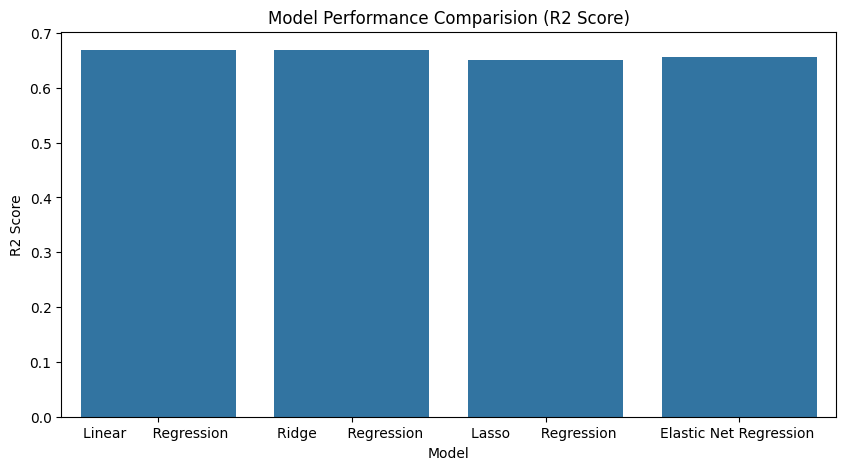

In [89]:
plt.figure(figsize=(10,5))

sns.barplot(x = 'Model', y = 'R2 Score', data = results_df)

plt.title('Model Performance Comparision (R2 Score)')

plt.xlabel('Model')

plt.ylabel('R2 Score')

plt.show()

## OBSERVATIONS:

1. The above graph shows the performance of R2 Score for each of the algorithms.

2. The R2 Score value for Linear and Ridge Regression is higher than Lasso and Elastic Net.

(ii) Mean Absolute Error:

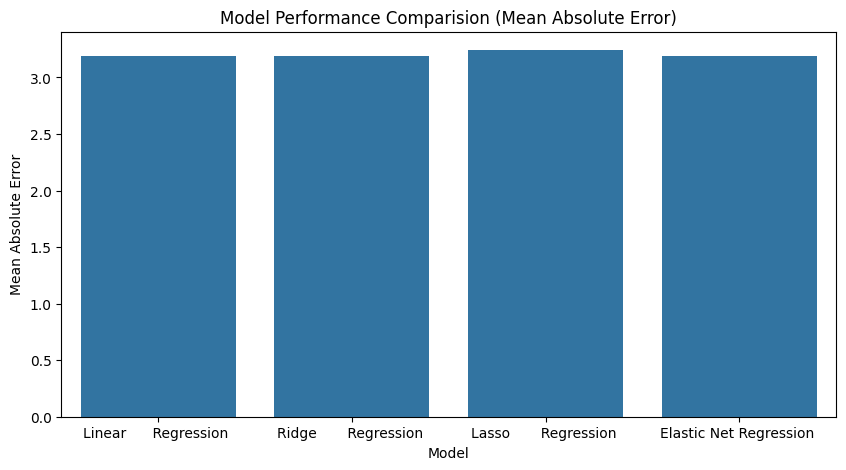

In [90]:
plt.figure(figsize=(10,5))

sns.barplot(x = 'Model', y = 'Mean Absolute Error', data = results_df)

plt.title('Model Performance Comparision (Mean Absolute Error)')

plt.xlabel('Model')

plt.ylabel('Mean Absolute Error')

plt.show()

## OBSERVATIONS:

1. The above graph shows the performance of mean absolute Score for each of the algorithms.

2. The mean absolute Score value for Lasso Regression is higher than other threee algorithms.

(iii)  Mean Squared Error

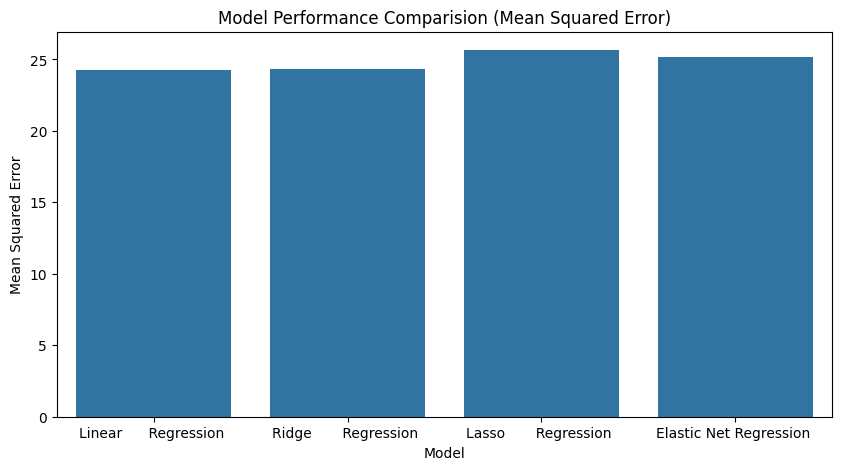

In [91]:
plt.figure(figsize=(10,5))

sns.barplot(x = 'Model', y = 'Mean Squared Error', data = results_df)

plt.title('Model Performance Comparision (Mean Squared Error)')

plt.xlabel('Model')

plt.ylabel('Mean Squared Error')

plt.show()

## OBSERVATIONS:

1. The above graph shows the performance of mean Squared Score for each of the algorithms.

2. The mean Squared Score value for Lasso Regression is higher than other three algorithms.

(iv) Root Mean Squared Error:

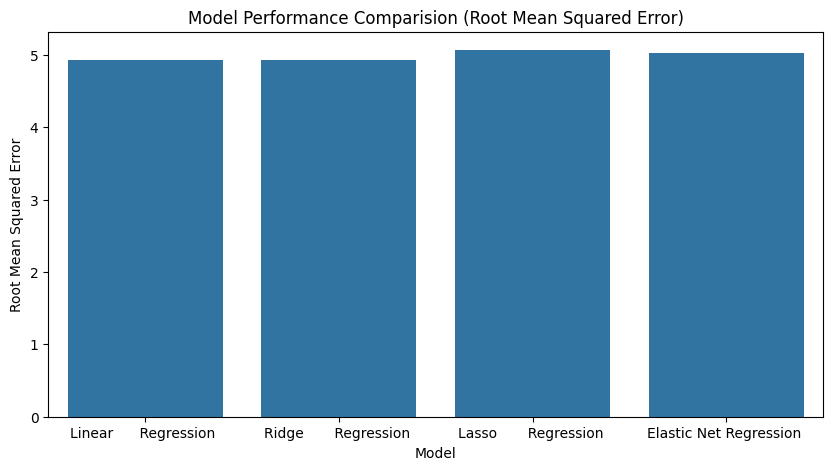

In [92]:
plt.figure(figsize=(10,5))

sns.barplot(x = 'Model', y = 'Root Mean Squared Error', data = results_df)

plt.title('Model Performance Comparision (Root Mean Squared Error)')

plt.xlabel('Model')

plt.ylabel('Root Mean Squared Error')

plt.show()

## OBSERVATIONS:

1. The above graph shows the performance of Root mean Squared Score for each of the algorithms.

2. The Root mean Squared Score value for Lasso Regression is higher than other three algorithms.